# ANOVA

## Introduction

One-way ANOVA compares the means of three or more groups, assuming that all values are sampled from Gaussian populations. It is called one-way ANOVA, because the groups are categorized by one scheme (e.g. treatment). Two-way ANOVA is used when the data are categorized by two schemes (e.g. treatment and gender).

![flowchart for selecting the right ANOVA function](https://pingouin-stats.org/_images/flowchart_one_way_ANOVA.svg)

The main problem with computing several t tests is multiple comparisons. As you include more groups in the study, you increase the chance of obtaining one or more P values less than 0.05 just by chance. If the null hypothesis were true, there would be a 5% chance that each particular t test would yield a P value less than 0.05, but with three comparisons, the chance that any one (or more) of the values would be less than 0.05 would be far higher that 5%

One-way ANOVA can be seen as a regression model with a **single categorical predictor**. This predictor usually has **2+ categories**. In fact ANOVA compares the fit of several models to the data, and this can be done with regression techniques. The answers will be fundamentally identical, but they will look very different.

Comparing three or more means with one-way ANOVA can be viewed as comparing the fit of the data to two different models:

- null hypothesis; all populations share the same mean, and nothing but random sampling causes any differences between sample means
- alternative hypothesis; all populations do not share the same means, at least one population has a mean different than the rest.

### Interpreting a P value

One-way ANOVA compares all the groups at once. The null hypothesis is that all groups were sampled from populations with identical means, i.e. there is no difference between means: $ \overline{x_1} = \overline{x_2} = ... = \overline{x_i}$.

The P value answers the question
>if the null hypothesis were true, what is the chance of randomly picking samples with mean values as different (or more different) than those observed in the study?

With a P value of 0.004, there is only 0.4% chance that the different means would be as far apart as actually observed or even further apart.

### How it works

The classic ANOVA is very powerful when the groups are **normally distributed** and have **equal variances** (homoscedasticity). It does not require all the samples to have the same number of values, though the two assumptions (Gaussian population and equal variance) matter much more when the sample size varies a lot between groups. When the groups have unequal variances, it is best to use the _Welch ANOVA_ that better controls for type I error.

The main idea of ANOVA is to partition the variance (sums of squares) into several components. For example, in one-way ANOVA:

$$ \text{SS}_\text{total} = \text{SS}_\text{effect} + \text{SS}_\text{error} $$
$$ \text{SS}_\text{total} = \sum_i \sum_j (Y_{ij} - \overline{Y})^2 $$
$$ \text{SS}_\text{effect} = \sum_i n_i (\overline{Y_i} - \overline{Y})^2 $$
$$ \text{SS}_\text{error} = \sum_i \sum_j (Y_{ij} - \overline{Y}_i)^2 $$

where:

- $ i=1,...,r $
- $ j=1,...,n_i $
- $ r $ the number of groups
- $ n_i $ the number of observations for the $ i $ th group
- $ N $ the total number of observations (in all groups)

The **total variability** among all the values, ignoring which value came from which group, by **summing the squares of the difference of each value from the grand mean**. Some of the variation comes from **differences among the group means** because the group means are not all the same. **Sum the squares of each group mean from the grand mean and weight by sample size** to get the sum of squares resulting from treatment. The rest of the variation comes from **variability within each group**, quantified by **summing the squares of the differences of each value from its group mean**. This is also called the residual sum of squares or the error sum of squares.

The F-statistics is then defined as:
$$ F^* = \frac{S_\text{effect}^2}{S_\text{error}^2} = \frac{\text{MS}_{\text{effect}}}{\text{MS}_{\text{error}}} = \frac{\text{SS}_{\text{effect}} / (r - 1)}{\text{SS}_{\text{error}} / (N - r)} $$

and the P-value can be calculated using a F-distribution with $ r - 1, N - r $ degrees of freedom.

The default effect size reported is the *partial eta-square*, which, **for one-way ANOVA is the same as eta-square and generalized eta-square**:
$$ \eta_p^2 = \frac{\text{SS}_{\text{effect}}}{\text{SS}_{\text{effect}} + \text{SS}_{\text{error}}} $$
$$ \eta^2 = \frac{\text{SS}_{\text{effect}}}{\text{SS}_{\text{total}}} $$

It is interpreted in the same way as $R^2$. For example, an $\eta^2$ of 0.053, only 5.3% of the total variability is the result of differences within the groups.

Of note, the concept of one- and two-tailed P values does not apply in ANOVA. Because the means of the groups can be in many different orders, the P values has many tails.

## Partitioning the sum of squares

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

This is the analysis of the variance: _comparing the ratio of systematic variance to unsystematic variance_ using sum of squares (SS), between the groups **SSB** (i.e. effect or $\text{SS}_\text{effect}$) and the variance within the group **SSW** (i.e. error, residual or $\text{SS}_\text{error}$), with $ \text{SSW} + \text{SSB} = \text{SST} $.

When F increase, then the variance between the group (SSB) is bigger than within the group (SSW).

The group means are represented as deviations from the grand mean by grouping their coefficients under a single term $ y_{ij} = \mu_{grand} + \tau_j + \epsilon_{ij} $

One example of one-way ANOVA comparing 3 groups:  

| Hypothesis  | Scatter from | SS    | Variation | $\eta^2$ |
| ----------- | ------------ | -----:| ---------:| -------- |
| Null        | Grand mean   | 17.38 |  100.0%   |          |
| Alternative | Group mean   | 16.45 |   94.7%   |          |
| Difference  |              |  0.93 |    5.3%   |  0.053   |

Of all the variation, 94.7% is the result of variation within the groups, leaving 5.3% of the total variation as the result of differences between the group means. *The sum of squares resulting from the treatment and the sum of squares within the groups always add up to the total sum of squares.*

| Source variation | SS    | DF  | MS    | F ratio | P value |
| ----------------:| -----:| ---:| ----- | ------  | ------- |
|   Between groups |  0.93 | 2   | 0.460 |  5.69   |  0.004  |
| + Within groups  | 16.45 | 202 | 0.081 |         |         |
| =          Total | 17.38 | 204 |       |         |         |

For the total, there are 205 values and only one parameter (grand mean) estimated, so $ \text{DF} = 204$. For the SSW, 3 groups/parameters were fit (the mean of each group), so $ \text{DF} = 205 - 3 = 202 $. If the null hypothesis were true, F would be likely to have a value close to 1.

In [2]:
dfn, dfd = 2, 202 # DF at numerator is for 'within', at the denominator for 'within'
F = .460 / .081

print(f"P values computed from the F ratio distribution: {1 - stats.f(dfn, dfd).cdf(F):.4f}")

P values computed from the F ratio distribution: 0.0040


The low P value means that the differences among group means would be very unlikely if in fact all the population means were equal.  
The low R² means that the differences among group means are only a tiny fraction of the overall variability.

## Practical example of one-way ANOVA

In [3]:
# 0. Load an example dataset comparing pain threshold as a function of hair color
data = pg.read_dataset('anova')
data.head()

,Subject,Hair color,Pain threshold
0,1,Light Blond,62
1,2,Light Blond,60
2,3,Light Blond,71
3,4,Light Blond,55
4,5,Light Blond,48


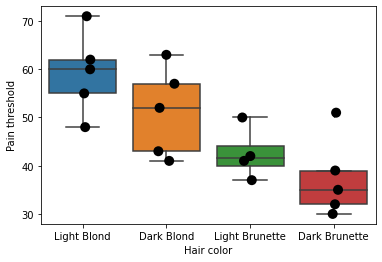

In [4]:
sns.boxplot(x='Hair color', y='Pain threshold', data=data)
sns.stripplot(x='Hair color', y='Pain threshold', data=data, color='black', size=10);

### Using pingouin

In [5]:
# 1. This is a between subject design, so the first step is to test for equality of variances
pg.homoscedasticity(data=data, dv='Pain threshold', group='Hair color')

,W,pval,equal_var
levene,0.392743,0.760016,True


In [6]:
# 2. If the groups have equal variances, we can use a regular one-way ANOVA
aov = pg.anova(
    data=data,
    dv='Pain threshold',
    between='Hair color',
    detailed=True
)
aov.round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,Hair color,1360.726,3,453.575,6.791,0.004,0.576
1,Within,1001.800,15,66.787,NaN,NaN,NaN


In [7]:
# Same but using a standard eta-squared instead of a partial eta-squared effect size. Also
# note how here we're using the anova function directly as a method (= built-in function)
# of our pandas dataframe. In that case, we don't have to specify data anymore.
data.anova(
    dv='Pain threshold',
    between='Hair color',
    detailed=False,
    effsize='n2',
)

,Source,ddof1,ddof2,F,p-unc,n2
0,Hair color,3,15,6.791407,0.004114,0.575962


In [8]:
# 3. If there is a main effect, we can proceed to post-hoc Tukey test
pg.pairwise_tukey(data=data, dv='Pain threshold', between='Hair color')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Dark Blond,Dark Brunette,51.2,37.4,13.8,5.168623,2.669957,0.074168,1.525213
1,Dark Blond,Light Blond,51.2,59.2,-8.0,5.168623,-1.547801,0.436903,-0.884182
2,Dark Blond,Light Brunette,51.2,42.5,8.7,5.482153,1.586968,0.416008,0.946285
3,Dark Brunette,Light Blond,37.4,59.2,-21.8,5.168623,-4.217758,0.003713,-2.409395
4,Dark Brunette,Light Brunette,37.4,42.5,-5.1,5.482153,-0.930291,0.769703,-0.554719
5,Light Blond,Light Brunette,59.2,42.5,16.7,5.482153,3.046249,0.036653,1.816432


### Using scipy.stats

In [9]:
# The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean.
F, p = stats.f_oneway(
    data[data['Hair color'] == 'Dark Blond']['Pain threshold'],
    data[data['Hair color'] == 'Dark Brunette']['Pain threshold'],
    data[data['Hair color'] == 'Light Blond']['Pain threshold'],
    data[data['Hair color'] == 'Light Brunette']['Pain threshold'],
)

print(f"F statistic = {F:.3f} with P value from the F distribution = {p:.5f}")

F statistic = 6.791 with P value from the F distribution = 0.00411


### Using statsmodels

In [10]:
import statsmodels.sandbox.stats as sandbox_stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols(
    formula="Q('Pain threshold') ~ Q('Hair color')",
    data=data
).fit() # we use OLS regression
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Q('Pain threshold')   R-squared:                       0.576
Model:                             OLS   Adj. R-squared:                  0.491
Method:                  Least Squares   F-statistic:                     6.791
Date:                 Fri, 10 Sep 2021   Prob (F-statistic):            0.00411
Time:                         16:42:04   Log-Likelihood:                -64.628
No. Observations:                   19   AIC:                             137.3
Df Residuals:                       15   BIC:                             141.0
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

C:\Users\Sébastien\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [11]:
anova_table = sm.stats.anova_lm(model)
anova_table.round(4)

,df,sum_sq,mean_sq,F,PR(>F)
Q('Hair color'),3.0,1360.7263,453.5754,6.7914,0.0041
Residual,15.0,1001.8000,66.7867,NaN,NaN


In [12]:
sm.stats.anova_lm(model, typ='II').round(3)

,sum_sq,df,F,PR(>F)
Q('Hair color'),1360.726,3.0,6.791,0.004
Residual,1001.800,15.0,NaN,NaN


### Using R

A pipeline for one-way ANOVA analysis in R can be the following:

```R
# data import
data <- read.csv2("PlantGrowth.csv", sep = ',', dec='.')
data <- data[-c(1)] # drop the 'X' (index) column

# EDA
head(data)
str(data)
levels(data$group) # check group encoding
summary(data)

# visualization
boxplot(weight~group, data)

# setup ANOVA as a linear regression model
fit = lm(weight~group, data)

plot(fit) # plots the following:
# 1. Residuals vs Fitted
# 2. Normal Q-Q
# 3. Scale-Location
# 4. Constant Leverage

# ANOVA table
aov = anova(fit)
aov
```

## Computing manually

In [13]:
# parameters of the analysis
r = data['Hair color'].nunique() # number of groups/conditions
N = len(data)                    # number of total values
DF_between = r - 1               # degrees of freedom for the effect Mean Square
DF_within  = N - r               # degrees of freedom for the error  Mean Square

print(f"There are {r} different conditions and {N} total values")
print(f"This leads to {DF_between} and {DF_within} degrees of freedom for the effect (SSB) and error (SSW) Mean Squares (MS) respectively")


# sums of squares
SST = (
    (
        data['Pain threshold'] -
        data['Pain threshold'].mean()
    )**2
).sum()

SSW = (
    data.groupby('Hair color')['Pain threshold']
    .transform(lambda x: (x - x.mean())**2) 
).sum()

SSB = SST - SSW

print(f"With SST = {SST:.1f} and SSW = {SSW:.1f}, we obtain SSB = {SSB:.1f}, and eta-squared = {SSB/SST:.6f}")


# MS
MS_between = SSB / DF_between
MS_within  = SSW / DF_within

print(f"MS for SSB = {MS_between:.1f} and for SSW = {MS_within:.1f}")


# F ratio and associated P value
Fratio = MS_between / MS_within
Pvalue = stats.f.sf(Fratio, DF_between, DF_within) # using here the `survival function 1 - cdf()`

print(f"Finally, with a F ratio = {Fratio:.6f}, the associated P value = {Pvalue:.6f}")

There are 4 different conditions and 19 total values
This leads to 3 and 15 degrees of freedom for the effect (SSB) and error (SSW) Mean Squares (MS) respectively
With SST = 2362.5 and SSW = 1001.8, we obtain SSB = 1360.7, and eta-squared = 0.575962
MS for SSB = 453.6 and for SSW = 66.8
Finally, with a F ratio = 6.791407, the associated P value = 0.004114


In [14]:
# we could also compute SSB from scratch
SSB = (
    data.groupby('Hair color')['Pain threshold']
    .apply(lambda x: x.count() * (x.mean() - data['Pain threshold'].mean())**2) 
).sum()

print(f"SSB computed from scratch = {SSB:.1f}")

SSB computed from scratch = 1360.7


### ANOVA table

| Hypothesis  | Scatter from | SS     | Variation | $\eta^2$ |
| ----------- | ------------ | ------:| ---------:| -------- |
| Null        | Grand mean   | 2362.5 |  100.0%   |          |
| Alternative | Group mean   | 1001.8 |   42.4%   |          |
| Difference  |              | 1360.7 |   57.6%   |  0.5760  |

Of all the variation, 42.4% is the result of variation within the groups, leaving 57.6% of the total variation as the result of differences between the group means.

| Source variation | SS     | DF  | MS    | F ratio | P value |
| ----------------:| ------:| ---:| ----- | ------  | ------- |
|  Between groups  | 1360.7 | 3   | 453.6 |  6.791  |  0.0041 |
| + Within groups  | 1001.8 | 15  |  66.8 |         |         |
| =         Total  | 2362.5 | 18  |       |         |         |

### Visualization of the F distribution

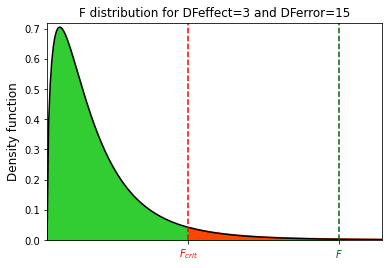

In [15]:
F_crit = stats.f(DF_between, DF_within).ppf(.95)

x = np.linspace(0, 18, num=500)
rvf = stats.f(DF_between, DF_within)
plt.plot(x, rvf.pdf(x), color='black')
hx = rvf.pdf(x)

plt.margins(y = 0)
plt.ylim((0, .72))
plt.xlim((0, Fratio+1))

# Shade the probability p-value
plt.fill_between(x[x <= Fratio], hx[x <= Fratio], edgecolor = None, color = 'limegreen')
# plot the observed F ratio
plt.axvline(x = Fratio, color = "darkgreen", linestyle = "--")
# Shade the probability alpha
plt.fill_between(
    x[x >= F_crit], hx[x >= F_crit], 
    edgecolor = "orangered", linestyle = "-", linewidth = 2, facecolor = 'orangered')

# plot the critical F value
plt.axvline(x = F_crit, color = "red", linestyle = "--")

ax=plt.gca()
ax.set_xticks([F_crit, Fratio])
ax.set_xticklabels(["$F_{crit}$", "$F$"], fontdict={'size': 10})
ax.get_xticklabels()[0].set_color("red")
ax.get_xticklabels()[1].set_color("darkgreen")
plt.ylabel('Density function', fontdict={'size': 12})
plt.title(f"F distribution for DFeffect={DF_between} and DFerror={DF_within}");

### Effect size

Omega squared ($\omega^2$) is another measure of the effect size, or the degree of association for a population. It is an estimate of **how much variance in the response variables are accounted for by the explanatory variables**. Omega squared is widely viewed as a lesser biased alternative to eta-squared, especially when sample sizes are small. Zero indicates no effect.
$$ \omega^2 = \frac{\sigma_Y^2 - \sigma_{Y \mid X}^2}{\sigma_Y^2}
= \frac{df_\text{effect} \times (\text{MS}_\text{effect} - \text{MS}_\text{error})}{df_\text{effect} \times \text{MS}_\text{effect} + (N - df_\text{effect}) \times \text{MS}_\text{error}}
= \frac{df_\text{effect} \times (\text{MS}_\text{effect} - \text{MS}_\text{error})}{\text{SS}_\text{total} + \text{MS}_\text{error}}
= \frac{\text{SS}_\text{effect} - (r - 1) \text{MS}_\text{error}}{\text{SS}_\text{total} + \text{MS}_\text{error}}
= \frac{(r-1) \times (F - 1)}{(r-1) \times (F - 1) + N} $$

In [16]:
print(f"omega squared = {DF_between * (MS_between - MS_within) / (DF_between * MS_between + (N - DF_between) * MS_within):.8f}")
print(f"omega squared = {DF_between * (MS_between - MS_within) / (SST + MS_within):.8f}")
print(f"omega squared = {(SSB - DF_between * MS_within) / (SST + MS_within):.8f}")
print(f"omega squared = {(r-1) * (Fratio-1) / ((r-1) * (Fratio-1) + N):.8f}")

omega squared = 0.47765205
omega squared = 0.47765205
omega squared = 0.47765205
omega squared = 0.47765205


### ANOVA reconstruction from summary data

One-way ANOVA (but not repeated-measures ANOVA) can be [computed without raw data](https://www.youtube.com/watch?v=PPQRZsBSpI8), so long as you know the mean, sample size and SD (or SEM) of each group.

When we look at the very first equations of $\text{SS}_\text{effect}$, $\text{SS}_\text{error}$ and $\text{SS}_\text{total}$, we see that we need the individual data points $ Y_{ij} $ in particular for computing $\text{SS}_\text{total}$. So we leave this equation apart.

For $\text{SS}_\text{effect} = \sum_i n_i (\overline{Y_i} - \overline{Y})^2 $, it's simply the sum of the squared difference between the group mean $ \overline{Y_i} $ and the grand mean $ \overline{Y} $ multiplied by the number of values in each group.

In the example below, the **grand mean** $ = (41 + 38 + 14 + 37) / 4 = 32.5 $. _Beware this is only true when the sample sizes accross the groups are equal, otherwise we should compute the proper sample mean._

| group | mean | $n_i$ | calculation  |
| -----:| ---- | ----- |:------------:|
|   A   |  41  |   8   | 8*(41-32.5)² |
|   B   |  38  |   8   | 8*(38-32.5)² |
|   C   |  14  |   8   | 8*(14-32.5)² |
|   D   |  37  |   8   | 8*(37-32.5)² |
|  sum  |      |       |     3720     |

For $ \text{SS}_\text{error} = \sum_i \sum_j (Y_{ij} - \overline{Y}_i)^2 $, we don't have access to the individual data points $ Y_{ij} $, but we have access to the standard deviation for each group. We know that the variance is the average of the sum of squares, with $ \sigma_i^2 = \frac{\text{SS}_\text{error}}{n_i - 1} $. Therefore $ \text{SS}_\text{error} $ is the sum of the squared standard deviation multiplied by the number or values minus 1 in each group as shown below:

| group | SD  | $n_i$ | calculation |
| -----:| --- | ----- |:-----------:|
|   A   | 3.5 |   8   | (8-1)*3.5²  |
|   B   | 4.6 |   8   | (8-1)*4.6²  |
|   C   | 3.8 |   8   | (8-1)*3.8²  |
|   D   | 4.9 |   8   | (8-1)*4.9²  |
|  sum  |     |       |   503.02    |

Let's compute the SSs using the Hair color dataset.

In [17]:
grand_mean = data['Pain threshold'].mean()
print(f"grand mean = {grand_mean}")

# getting the count, mean and std for each group
calc_table = data.groupby('Hair color').describe()['Pain threshold'].loc[:, ['count', 'mean', 'std']]

calc_table['SSeffect'] = calc_table['count'] * (calc_table['mean'] - grand_mean)**2
calc_table['SSerror']  = (calc_table['count'] - 1) * calc_table['std']**2
calc_table.loc['sum'] = calc_table.sum(axis=0) # adding a new line as sum margin

pg.print_table(calc_table.reset_index(), tablefmt='simple')

print(f"The values to be used in the ANOVA table are SSeffect = {calc_table.loc['sum','SSeffect']:.1f}, \
with DFeffect = {DF_between}, and SSerror = {calc_table.loc['sum','SSerror']:.1f} with DFerror = {DF_within}")

grand mean = 47.8421052631579
Hair color        count     mean     std    SSeffect    SSerror
--------------  -------  -------  ------  ----------  ---------
Dark Blond        5.000   51.200   9.284      56.377    344.800
Dark Brunette     5.000   37.400   8.325     545.188    277.200
Light Blond       5.000   59.200   8.526     645.009    290.800
Light Brunette    4.000   42.500   5.447     114.152     89.000
sum              19.000  190.300  31.582    1360.726   1001.800

The values to be used in the ANOVA table are SSeffect = 1360.7, with DFeffect = 3, and SSerror = 1001.8 with DFerror = 15


## Repeated-measures one-way ANOVA

The difference between ordinary and repeated-measures ANOVA is the same as the difference between the unpaired and paired t tests. Use repeated-measures ANOVA to analyze data collected in three kinds if experiments:

* measurements are made repeatedly for each subject (e.g. before, during and after)
* subjects are recruited as matched sets or _blocks_, which are matched for variables such as age, postal code, diagnosis etc.
* experiment is run several times, each time with several treatment handled in parallel

More generally, you should use a repeated-measures test **whenever the value of one subject in the first group is expected to be closer to a particular value in the other group than to a random subject in the other group**.

In one-way repeated-measures ANOVA, the total variance (sums of squares) is divided into three components $ \text{SS}_{\text{total}} = \text{SS}_{\text{effect}} + (\text{SS}_{\text{subjects}} + \text{SS}_{\text{error}}) $, with $ \text{SS}_\text{subjects} = r \sum (\overline Y_s - \overline Y)^2 $ and $ \overline Y_s $ the mean of the $ s $ th subject.

The F statistic is defined as

$$ F^* = \frac{\text{MS}_{\text{effect}}}{\text{MS}_{\text{error}}} = \frac{\frac{\text{SS}_{\text{effect}}}{r-1}}{\frac{\text{SS}_{\text{error}}}{(n - 1)(r - 1)}} $$

and the P value can be calculated using a F-distribution with $ v_{\text{effect}} = r - 1 $ and $ v_{\text{error}} = (n - 1)(r - 1) $ degrees of freedom.

In one-way repeated-measures ANOVA, there is only one factor (treatment of timepoint) to study. The variation is divided into three components including within-subjects ($\text{SS}_\text{subjects}$), variation among the treatments or time points ($\text{SS}_\text{B}$), and residual variance ($\text{SS}_\text{E}$), as follows:

| Source of variation  | Degree of freedom                 | Sum of squares       | Mean square       | F value     |
| -------------------- | --------------------------------- | -------------------- | ----------------- | ----------- |
| Subjects             | $\text{DF}_\text{S} = n - 1$      | $\text{SS}_\text{S}$ |                   |             |
| Treatment/Time point | $\text{DF}_\text{B} = k - 1$      | $\text{SS}_\text{B}$ | $MS_B=SS_B/DF_B $ | $MS_B/MS_E$ |
| Residuals or error   | $\text{DF}_\text{E} = (n-1)(k-1)$ | $\text{SS}_\text{E}$ | $MS_E=SS_E/DF_E $ |             |
| Total                | $\text{DF}_\text{T} = nk-1$       | $\text{SS}_\text{T}$ |                   |             |

In [18]:
data_rm = pg.read_dataset('rm_anova')
data_rm.head()

,Subject,Gender,Region,Education,DesireToKill,Disgustingness,Frighteningness
0,1,Female,North,some,10.0,High,High
1,1,Female,North,some,9.0,High,Low
2,1,Female,North,some,6.0,Low,High
3,1,Female,North,some,6.0,Low,Low
4,2,Female,North,advance,10.0,High,High


In [19]:
pg.rm_anova(
    dv='DesireToKill',
    within='Disgustingness',
    subject='Subject',
    data=data_rm,
    detailed=False,
    effsize="ng2"
)

,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,Disgustingness,1,92,12.043878,0.000793,0.025784,1.0


### Repeated measures two-way ANOVA

In two-way repeated measures ANOVA, there are two within-subjects factors (treatments or time) to study. In the example below:

- the same animals were first given inactive treatment and the response measured; then they were given the active treatment and the response measured again
- the same animals are first measured for a response after a short duration and then later after a long duration
- each animal was first given the inactive treatment and measured for a short and then a long duration; then the same animal was given the active treatment and measured for a short and then a long duration. This is a **repeated measures in both factors** design.

plants    nutrient_level    year    time      num_leaves
--------  ----------------  ------  ------  ------------
P1        Low               Year1   Week1              4
P2        Low               Year1   Week1              3
P3        Low               Year1   Week1              6
P4        Low               Year1   Week1              5
P5        Low               Year1   Week1              5



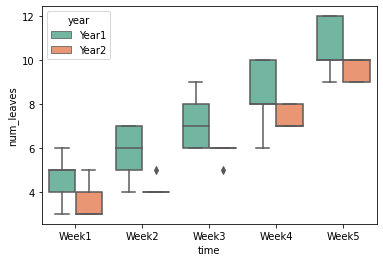

In [20]:
# we use another dataset to illustrate the concept
data_rm2 = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/plants_leaves_two_within.csv")
pg.print_table(data_rm2.head())

sns.boxplot(
    x='time',
    y='num_leaves',
    data=data_rm2,
    hue='year',
    palette='Set2',
);

In [21]:
pg.rm_anova(
    dv='num_leaves',
    within=['time', 'year'],
    subject='plants',
    data=data_rm2,
    detailed=True,
).round(4)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,time,226.88,4,16,56.72,158.6573,0.0000,0.0000,0.9754,0.4212
1,year,18.00,1,4,18.00,3.6000,0.1306,0.1306,0.4737,1.0000
2,time * year,0.80,4,16,0.20,1.4545,0.2621,0.2917,0.2667,0.4416


We reject the null hypothesis in favor of the alternate hypothesis for time, but not for year and time + year interaction.

### Repeated-measures ANOVA with statsmodels

In [22]:
from statsmodels.stats.anova import AnovaRM

res_rmANOVA = AnovaRM(
    data=data_rm2,
    depvar='num_leaves',
    subject='plants',
    within=['time', 'year'],
)
print(res_rmANOVA.fit())

                 Anova
          F Value  Num DF  Den DF Pr > F
----------------------------------------
time      158.6573 4.0000 16.0000 0.0000
year        3.6000 1.0000  4.0000 0.1306
time:year   1.4545 4.0000 16.0000 0.2621



## Two-way ANOVA (also called _two-factor ANOVA_)

The data are divided in two ways because each data point is either from an animal given either an inactive or active treatment (one factor) given for either a short or long duration (second factor). If male and female animals were both included you'd need three-way ANOVA, so that each value would be categorized in three ways, i.e. treatment, duration and gender.

Two-way ANOVA simultaneously tests 3 null hypotheses and so computes 3 P values:

1. There is no **interaction between the two factors** (treatment and duration), i.e. H0 is that the difference in effects between durations is the same in animals given active or inactive treatment, or that the treatment causes the same change in response if given for short or long duration.
2. The population means are identical for animals given placebo and active treatment (treatment, i.e. **first factor**), pooling short and long duration.
3. The population means are identical for animals given a treatment for short vs. long duration (duration, i.e. **second factor**).


### How two-way ANOVA works

The bottom row of the ANOVA table quantifies the total variation among all the values, paying no attention to which row or column they are in. It is the **sum-of-squares of the squared difference between each value and the grand mean**. The rest of the table breaks this variability into four components: interaction, differences between rows (on the average), differences between columns (on the average) and variation amoing replicates in the same row and column. Each MS is divided by the residual MS to compute an F ratio, and this is used to obtain a P value.

| Source of variation | Sum squares | DF |  MS   |
| -------------------:|:----------- | -- | ----- |
|   Interaction       |    12896    |  1 | 12896 |
| \+ Between rows     |     5764    |  1 |  5764 |
| \+ Between columns  |     3710    |  1 |  3710 |
| \+ Among replicates |      928    |  8 |   116 |
| \= Total            |    23298    | 11 |       |

![Partionining of the sum of squares](https://www.marsja.se/wp-content/uploads/2016/03/two-way-anova-sum-of-squares.png)

  Ss  Blend    Crop      Yield
----  -------  ------  -------
   1  Blend X  Wheat       123
   2  Blend X  Wheat       156
   3  Blend X  Wheat       112
   4  Blend X  Wheat       100
   5  Blend X  Corn        128



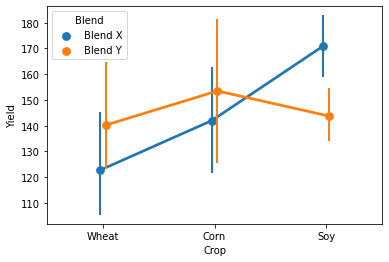

In [23]:
# two-way ANOVA with balanced design (equal n for all level combinations)
# but works similar with unbalanced design (thus requires statsmodels)
data2 = pg.read_dataset('anova2')
pg.print_table(data2.head())
sns.pointplot(
    data=data2,
    x='Crop',
    y='Yield',
    hue='Blend',
    dodge=True,
    errwidth=2,
);

In [24]:
data2.anova(
    dv="Yield",
    between=["Crop", "Blend"],
    detailed=True,
).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,Crop,2736.583,2,1368.292,2.525,0.108,0.219
1,Blend,2.042,1,2.042,0.004,0.952,0.000
2,Crop * Blend,2360.083,2,1180.042,2.178,0.142,0.195
3,Residual,9753.250,18,541.847,NaN,NaN,NaN


In [25]:
grand_mean2 = data2['Yield'].mean()
print(f"grand mean for the two-way ANOVA = {grand_mean2}")

grand mean for the two-way ANOVA = 145.54166666666666


In [26]:
data2_crop = data2.groupby('Crop').describe().loc[:, ('Yield', ['mean', 'count'])].droplevel(level=0, axis=1)
data2_crop

,mean,count
Crop,,
Corn,147.750,8.0
Soy,157.375,8.0
Wheat,131.500,8.0


We first calculate the sum of squares for the 1st factor 'Crop'. For each Crop, we calculate the **difference of its group mean to the grand mean and square it, and add it up for all the individual values**.
For example, the Yield mean in the Corn, Soy and Wheat Corn groups are respectively 147.75, 157.375 and 131.5, and the Yield grand mean equals 145.5, and there are 8 values un each groups.

In [27]:
SS_crop = 8 * (147.75 - grand_mean2)**2 + 8 * (157.375 - grand_mean2)**2 + 8 * (131.5 - grand_mean2)**2
print(f"SS for factor 1 (Crop) = {SS_crop:.3f}") # corresponds to the SS on the 1st line of the ANOVA table

DF_crop = data2['Crop'].nunique() - 1
print(f"Degree of freedom for Crop factor: DF_crop = {DF_crop}")

SS for factor 1 (Crop) = 2736.583
Degree of freedom for Crop factor: DF_crop = 2


In [28]:
# we can run that directly in the data2_crop dataframe
data2_crop['SS_crop'] = data2_crop['count'] * (data2_crop['mean'] - grand_mean2)**2
data2_crop.loc['sum'] = data2_crop.sum(axis=0)
data2_crop

,mean,count,SS_crop
Crop,,,
Corn,147.750,8.0,39.013889
Soy,157.375,8.0,1120.222222
Wheat,131.500,8.0,1577.347222
sum,436.625,24.0,2736.583333


For the sum of squares for the 2nd factor 'Blend', we use a similar approach.

In [29]:
data2_blend = data2.groupby('Blend').describe().loc[:, ('Yield', ['mean', 'count'])].droplevel(level=0, axis=1)
data2_blend['SS_blend'] = data2_blend['count'] * (data2_blend['mean'] - grand_mean2)**2
data2_blend.loc['sum'] = data2_blend.sum(axis=0)
data2_blend

,mean,count,SS_blend
Blend,,,
Blend X,145.250000,12.0,1.020833
Blend Y,145.833333,12.0,1.020833
sum,291.083333,24.0,2.041667


In [30]:
SS_blend = 12 * (145.25 - grand_mean2)**2 + 12 * (145.833333 - grand_mean2)**2
print(f"SS for factor 2 (Blend) = {SS_blend:.3f}") # corresponds to the SS on the 2nd line of the ANOVA table

DF_blend = data2['Blend'].nunique() - 1
print(f"Degree of freedom for Blend factor: DF_blend = {DF_blend}")

SS for factor 2 (Blend) = 2.042
Degree of freedom for Blend factor: DF_blend = 1


The approach for residuals/error is similar to the SSW computed for one-way ANOVA, here using the 'Crop' and 'Blend' subgroups and calculating the sum of squares for each individual value. The degree of freedom for the within sum of squares equals **the number of factor 'Crop' times the number of factors 'Blend' times the number of replicates in each combination of factor minus 1**. Of note, _the degrees of freedom for the interaction 'Crop*Blend' is equal to the product of the degrees of freedom for the individual factors._

In [31]:
SSW_2 = (
    data2.groupby(['Crop', 'Blend'])['Yield']
    .apply(lambda x: (x - x.mean())**2)
).sum()

print(f"SS for residuals/within = {SSW_2:.3f}") # corresponds to the SS on the last line of the ANOVA table

replicates = data2.groupby(['Crop', 'Blend']).count().iloc[0,0]
DF_W = (DF_crop + 1) * (DF_blend + 1) * (replicates - 1)
print(f"Degree of freedom for within: DF_within = {DF_W}")

SS for residuals/within = 9753.250
Degree of freedom for within: DF_within = 18


Finally, we calculate the total SS, as the squared difference of each value to the grand mean. It's exactly the same as for one-way ANOVA. _The degrees of freedom total is equal to the total number of values minus 1._

In [32]:
SST_2 = (
    (
        data2['Yield'] -
        data2['Yield'].mean() # or grand_mean2
    )**2
).sum()

print(f"SST = {SST_2:.3f}") # corresponds to the sum of all the SS in the ANOVA table

DF_T = len(data2) - 1
print(f"Degree of freedom Total DF_total = {DF_T}")

SST = 14851.958
Degree of freedom Total DF_total = 23


We then complete the ANOVA table and compute the F ratio for each factor and interaction as in one-way ANOVA, first by completing the values for the interaction or 'both factors' row, knowing that the SS sum up together as the degrees of freedom:

| Source of variation | Sum squares | DF |  MS    | F ratio | P value |
|:-------------------:|:----------- | -- | ------ | ------- | ------- |
|    Factor 1 (Crop)  |   2736.58   |  2 | 1368.3 |  2.525  |  0.108  | 
| \+ Factor 2 (Blend) |      2.04   |  1 |    2.0 |  0.004  |  0.952  |
| \+ both factors     |   2360.08   |  2 | 1180.0 |  2.178  |  0.142  |
| \+ Within (error)   |   9753.25   | 18 |  541.8 |         |         |
| \= Total            |  14851.96   | 23 |        |         |         |

In [33]:
SSB_2 = SST_2 - (SS_blend + SS_crop + SSW_2)
DF_B  = DF_T  - (DF_blend + DF_crop + DF_W )

print(f"SS for interaction SS_B = {SSB_2:.3f} with {DF_B} degrees of freedom") # corresponds to the SS Crop*Blend in the ANOVA table

SS for interaction SS_B = 2360.083 with 2 degrees of freedom


In [34]:
MS_crop = SS_crop / DF_crop
MS_blend= SS_blend/ DF_blend
MS_W2   = SSW_2   / DF_W
MS_B2   = SSB_2   / DF_B

F_crop  = MS_crop / MS_W2
F_blend = MS_blend/ MS_W2
F_B2    = MS_B2   / MS_W2

Pvalue_crop = stats.f.sf(F_crop, DF_crop, DF_W)
Pvalue_blend= stats.f.sf(F_blend,DF_blend,DF_W)
Pvalue_B2   = stats.f.sf(F_B2,   DF_B    ,DF_W)

print(f"*For factor Within, MS = {MS_W2:.2f}")

print(f"*For factor Crop, P value = {Pvalue_crop:.3f} with F ratio = {F_crop:.3f}  and MS = {MS_crop:.2f}")
print(f"*For factor Blend, P value = {Pvalue_blend:.3f} with F ratio = {F_blend:.3f} and MS = {MS_blend:.2f}")
print(f"*For factor Crop*Blend, P value = {Pvalue_B2:.3f} with F ratio = {F_B2:.3f} and MS = {MS_B2:.2f}")

*For factor Within, MS = 541.85
*For factor Crop, P value = 0.108 with F ratio = 2.525  and MS = 1368.29
*For factor Blend, P value = 0.952 with F ratio = 0.004 and MS = 2.04
*For factor Crop*Blend, P value = 0.142 with F ratio = 2.178 and MS = 1180.04


### ANCOVA

Analysis of covariance (ANCOVA) is a general linear model which blends ANOVA and regression. It's a model that is equivalent to multiple linear regression when **at least one independent variable is categorical and at least one is continuous**.

ANCOVA evaluates whether the means of a dependent variable (dv) are equal across levels of a categorical independent variable (between) often called a treatment, while statistically controlling for the effects of other continuous variables that are not of primary interest, known as covariates or nuisance variables (covar).

In [35]:
data_ancova = pg.read_dataset('ancova')
data_ancova.head()

,Scores,Income,BMI,Method
0,12,17.5,20,A
1,39,104.6,20,A
2,36,64.7,24,A
3,17,47.0,19,A
4,25,22.0,21,A


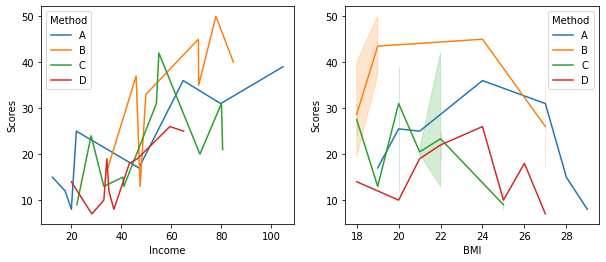

In [36]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.lineplot(
    x='Income',
    y='Scores',
    data=data_ancova,
    hue='Method',
)

plt.subplot(122)
sns.lineplot(
    x='BMI',
    y='Scores',
    data=data_ancova,
    hue='Method',
);

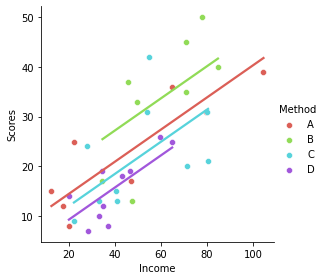

In [71]:
pg.plot_rm_corr(
    data=data_ancova,
    x='Income',
    y='Scores',
    subject='Method',
    legend=True,
);

In [37]:
# Evaluating the scores with different method and income or BMI as a covariate
pg.ancova(data=data_ancova, dv='Scores', covar=['Income', 'BMI'], between='Method')

,Source,SS,DF,F,p-unc,np2
0,Method,552.284043,3,3.232550,0.036113,0.244288
1,Income,1573.952434,1,27.637304,0.000011,0.479504
2,BMI,60.013656,1,1.053790,0.312842,0.033934
3,Residual,1708.508657,30,NaN,NaN,NaN


## Multiple comparison tests after ANOVA

The goal is to compare every mean with every other mean. To avoid getting fooled by bogus statistically significant conclusions, the significance level is refined to apply to an entire family of comparisons, rather than to each individual comparisons. Using the new definition of statistical significance will reduce the chance of obtaining false reports of statistically significance (type I errors) but at the cost of reducing the power to detect real differences (type II errors).  

### Tukey

The results of Tukey (or more generally Tuker-Kramer test which allows for unequal sample size) include both CIs and conclusions about statistical significance.

In [39]:
mult_comp = sm.stats.multicomp.MultiComparison(
    data['Pain threshold'],
    data['Hair color'],
) # P values are computed but not displayed

In [40]:
print(mult_comp.tukeyhsd())

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1        group2     meandiff p-adj   lower    upper  reject
--------------------------------------------------------------------
   Dark Blond  Dark Brunette    -13.8 0.0742 -28.6977  1.0977  False
   Dark Blond    Light Blond      8.0 0.4369  -6.8977 22.8977  False
   Dark Blond Light Brunette     -8.7  0.416 -24.5014  7.1014  False
Dark Brunette    Light Blond     21.8 0.0037   6.9023 36.6977   True
Dark Brunette Light Brunette      5.1 0.7697 -10.7014 20.9014  False
  Light Blond Light Brunette    -16.7 0.0367 -32.5014 -0.8986   True
--------------------------------------------------------------------


These are multiple comparisons CIs, so the 95% confidence level applies to the entire family of comparisons, rather than to each individual interval. There is a 95% change that all three of these CIs include the true population value, leaving a 5% chance that any one or more of the intervals does not include the population value.  
If a 95% CI for the difference between two means include zero (H0) then the difference is not statistically significant (P>0.05).  
The 5% significance level is a **familywise significance level**, meaning that it applies to the entire set of comparisons. If the null hypothesis is true, there is a 5% chance that one or more of the comparisaons will be statistically significant. The _yes/no_ conclusions apply to each comparison individually. Said differently, there is a 95% chance that none of the comparisons will be declared statistically significant.

In summary, for a family of comparisons, if all null hypotheses were true, there is a 5% chance that random sampling would lead to one or more incorrect conclusions that there is a real difference between the mean of two groups.

In the previous multiple comparison table, the CI of the difference between the mean of `Dark Brunette` and `Light Blond` does not include zero, so that the difference is statistically significant.  

It really doesn't make sense to think about whether one particular comparison is statistically significant (accounting for the rest). Instead, think that the method divides the family of comparisons into two piles, those that are deemed to be statistically significant and those that are not. **Think about the set of differences deemed to be statistically significant, not about individual comparisons.**

In [42]:
mult_comp_2 = sm.stats.multicomp.pairwise_tukeyhsd(
    data['Pain threshold'],
    data['Hair color'],
)
# Tukey's Honestly Significant Difference
mult_comp_2.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Dark Blond,Dark Brunette,-13.8,0.0742,-28.6977,1.0977,False
Dark Blond,Light Blond,8.0,0.4369,-6.8977,22.8977,False
Dark Blond,Light Brunette,-8.7,0.416,-24.5014,7.1014,False
Dark Brunette,Light Blond,21.8,0.0037,6.9023,36.6977,True
Dark Brunette,Light Brunette,5.1,0.7697,-10.7014,20.9014,False
Light Blond,Light Brunette,-16.7,0.0367,-32.5014,-0.8986,True


In [74]:
mult_comp_2.confint

array([[-28.69769066,   1.09769066],
       [ -6.89769066,  22.89769066],
       [-24.50138713,   7.10138713],
       [  6.90230934,  36.69769066],
       [-10.70138713,  20.90138713],
       [-32.50138713,  -0.89861287]])

In [73]:
np.diff(mult_comp_2.confint) # same CI for all three comparisons (see end of this part)

array([[29.79538132],
       [29.79538132],
       [31.60277427],
       [29.79538132],
       [31.60277427],
       [31.60277427]])

When computing most multiple comparisons tests, the SD for difference between 2 means is not computed from the SDs of those two groups but rather from the pooled SD of all the groups. Given the assumptions of the analysis, there is a 95% chance that all of these CIs include the true population value, leaving a 5% chance that _any one or more_ of the intervals does not include the population value.  

The margin of error of the CI is computed by multiplying the SE of the difference by a critical value that depends on the choice of test, the number of df, the degree of confidence desired and the number of comparisons:
$$
\bar{y_i} - \bar{y_j} \pm t_{1-\alpha/2}\sqrt{\frac{SSE}{n-k}\left(\frac{1}{n_i}+\frac{1}{n_j}\right)}
$$

with $$ t = \frac{\bar{x_i} - \bar{x_j}}{\sqrt{2 . \mathrm{MS_w} / n}} $$

and $\mathrm{MSE} = \frac{\mathrm{SSE}}{n-k} = s_p^2$ (pooled variance)

C:\Users\Sébastien\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


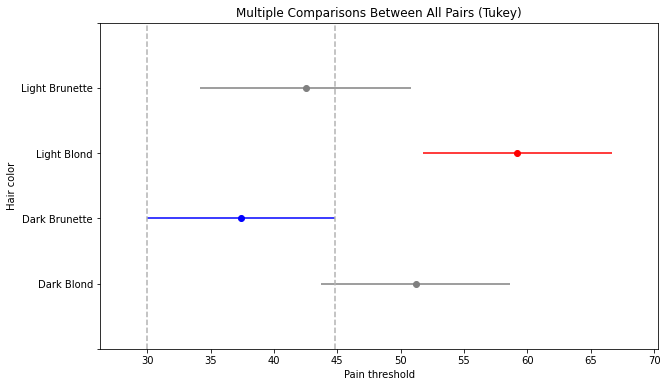

In [70]:
_ = mult_comp_2.plot_simultaneous(
    comparison_name='Dark Brunette',
    xlabel='Pain threshold',
    ylabel='Hair color',
)

## Dunnett's test
Compares the mean of each group to the mean of a control group without comparing the other groups among themselves. The test makes fewer comparisons than Tukey's method, so it generates narrower CIs and has more power to detect differences.

## Bonferroni's test
Bonferroni's multiple comparisons test should be used when the experiment design requires comparing only selected pairs of means (different from Tukey -> all vs. all, and Dunnett -> all vs. control).

results = mult_comp.allpairtest(stats.ttest_ind, method='bonf')
results[0]

In [45]:
p_val_adj = .05 / 3
p_val_adj

0.016666666666666666

In [ ]:
res = stats.ttest_ind(data[data['group'] == 'ctrl']['weight'],
                     data[data['group'] == 'trt1']['weight'])
res

In [ ]:
res.pvalue <= p_val_adj

The individual t-tests that are conducted have to have a p-value less than 0.01667 in order to be considered significant.

In [ ]:
from statsmodels.sandbox.stats.multicomp import multipletests

In [ ]:
multipletests([.05, 0.3, 0.01], alpha=.05, method='bonferroni')

### allpairtest

In [46]:
mult_comp.allpairtest(stats.ttest_ind, method='bonf')[0]

group1,group2,stat,pval,pval_corr,reject
Dark Blond,Dark Brunette,2.4746,0.0384,0.2306,False
Dark Blond,Light Blond,-1.4191,0.1936,1.0,False
Dark Blond,Light Brunette,1.6475,0.1435,0.8607,False
Dark Brunette,Light Blond,-4.0907,0.0035,0.0209,True
Dark Brunette,Light Brunette,-1.0511,0.3281,1.0,False
Light Blond,Light Brunette,3.3797,0.0118,0.0706,False


The pairwise.ttest for independent samples in R, as well as the Tukey HSD test in both R and statsmoldels, use the **joint variance across all samples**, while the pairwise ttest calculates the joint variance estimate for each pair of sample separately. _stats.ttest_ind_ just looks at one pair at a time:  

```Rscipt
pairwise.t.test(data$weight, data$group, p.adj = "bonferroni")

data:  data$weight and data$group 

     ctrl  trt1 
trt1 0.583 -    
trt2 0.263 0.013

P value adjustment method: bonferroni
```

In [54]:
# pip install scikit-posthocs
import scikit_posthocs as sp
print(
    sp.posthoc_ttest(
        data,
        val_col='Pain threshold',
        group_col='Hair color',
        pool_sd=True,
        p_adjust='b'
    )
)

                Light Blond  Dark Blond  Light Brunette  Dark Brunette
Light Blond        1.000000    0.104878        0.855039       0.800231
Dark Blond         0.104878    1.000000        0.004474       1.000000
Light Brunette     0.855039    0.004474        1.000000       0.048994
Dark Brunette      0.800231    1.000000        0.048994       1.000000


(<AxesSubplot:>, <matplotlib.colorbar.ColorbarBase at 0x1bc9f82f580>)

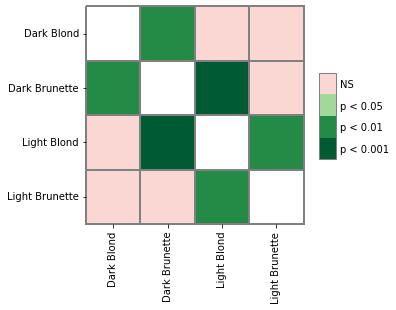

In [61]:
pc = sp.posthoc_conover(
    data,
    val_col='Pain threshold',
    group_col='Hair color',
)

# significance plots
heatmap_args = {
    'linewidths': 0.25,
    'linecolor': '0.5',
    'clip_on': False,
    'square': True,
    'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]
}

sp.sign_plot(pc, **heatmap_args)

## Holm adjustment
The Holm adjustment sequentially compares the lowest p-value with a Type I error rate that is reduced for each consecutive test. In our case, this means that our first p-value is tested at the .05/3 level (.017), second at the .05/2 level (.025), and third at the .05/1 level (.05). This method is generally considered superior to the Bonferroni adjustment.

In [57]:
mult_comp.allpairtest(stats.ttest_ind, method='h')[0]

group1,group2,stat,pval,pval_corr,reject
Dark Blond,Dark Brunette,2.4746,0.0384,0.1537,False
Dark Blond,Light Blond,-1.4191,0.1936,0.4304,False
Dark Blond,Light Brunette,1.6475,0.1435,0.4304,False
Dark Brunette,Light Blond,-4.0907,0.0035,0.0209,True
Dark Brunette,Light Brunette,-1.0511,0.3281,0.4304,False
Light Blond,Light Brunette,3.3797,0.0118,0.0588,False


### Post-hoc analysis with R

A pipeline for post-hoc analysis upon ANOVA in R can be the following:

```R
# Post-hoc analysis
library("lsmeans") # needed for ANOVA analysis and post-hoc tests

pairwise.t.test(data$weight, data$group, p.adj = "none") # using pooled SD
pairwise.t.test(data$weight, data$group, p.adj = "none", pool.sd = FALSE) # no adjustment
pairwise.t.test(data$weight, data$group, p.adj = "bonferroni")
pairwise.t.test(data$weight, data$group, p.adj = "holm")

summary(glht(fit, linfct=mcp(group="Dunnett")))

lsmeans(fit, pairwise ~ group) # results of Tukey's test with P values
# see also TukeyHSD()
```